# CIS 3715 Final Project

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

EData = pd.read_csv("employee_churn_data.csv")

#Initial data preprocessing. What data types are there, and are there any missing values?
print(EData.info(), "\n")
print(EData.isnull().sum())
print(EData.shape)
# print(EData)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB
None 

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64
(9540, 10)


This data has no empty values, which means that we do not have to calculate values to fill missing cells, or choose to delete any factors from this dataset. However, it does have multiple rows which are full of qualitative operators, and need to be converted to quantitative operators

Histograms of all the quantitative data from the dataset

array([[<Axes: title={'center': 'promoted'}>,
        <Axes: title={'center': 'review'}>,
        <Axes: title={'center': 'projects'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'satisfaction'}>,
        <Axes: title={'center': 'bonus'}>],
       [<Axes: title={'center': 'avg_hrs_month'}>, <Axes: >, <Axes: >]],
      dtype=object)

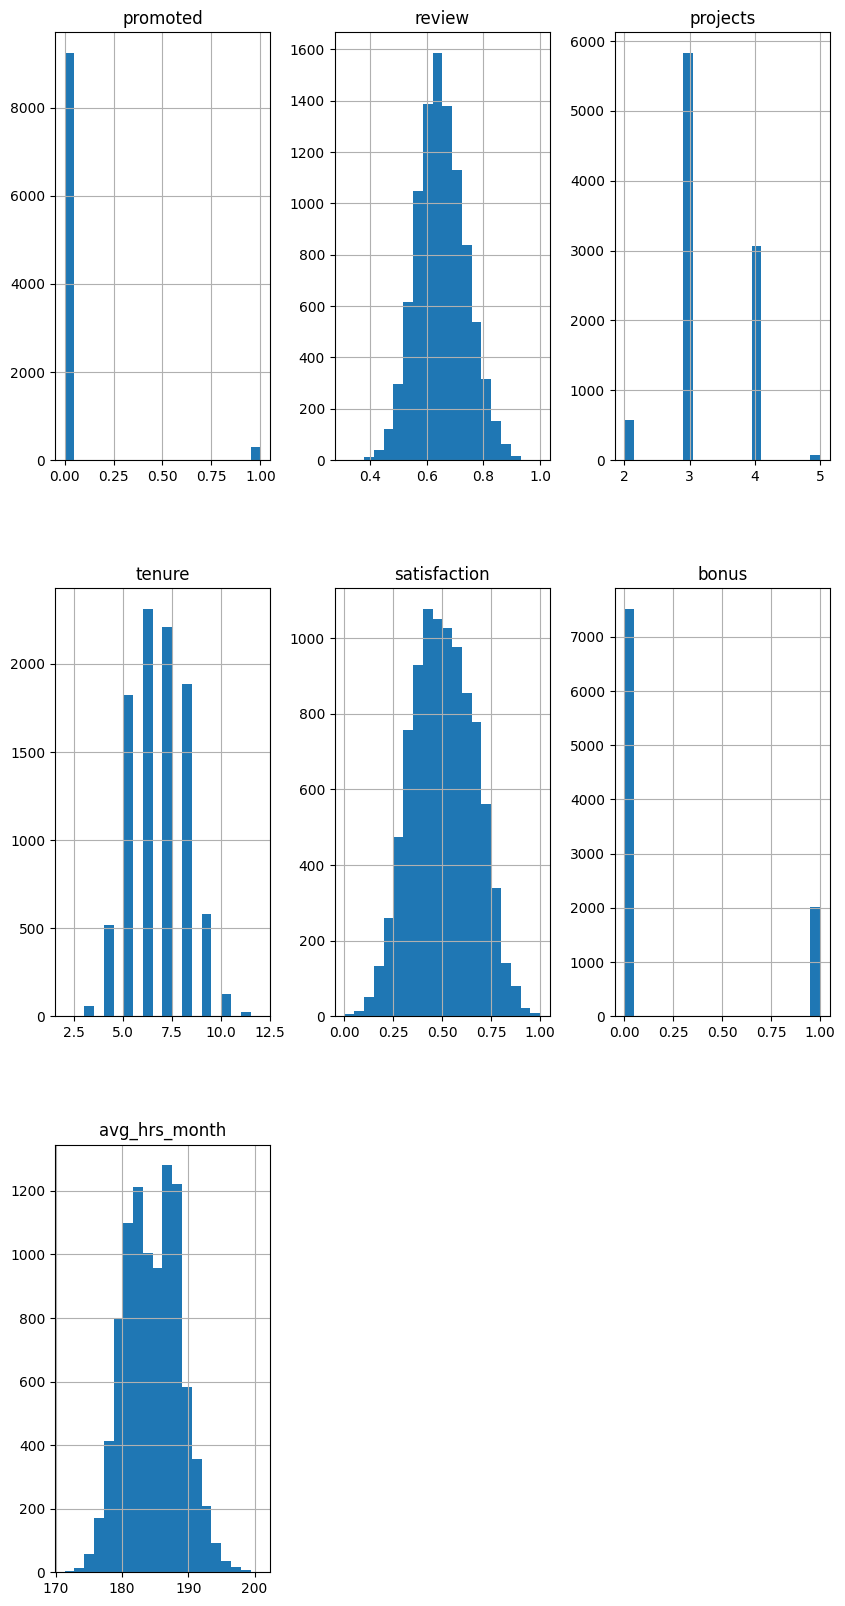

In [9]:
EData.hist(bins = 20, figsize = (10, 20))

In [10]:
#corr = EData[['department', 'salary', 'left']].corr()
#corr.style.background_gradient()
#not sure how you got this to work?

Bar Plots of the qualitative data (department, salary, and if the employee chose to leave) before label encoding

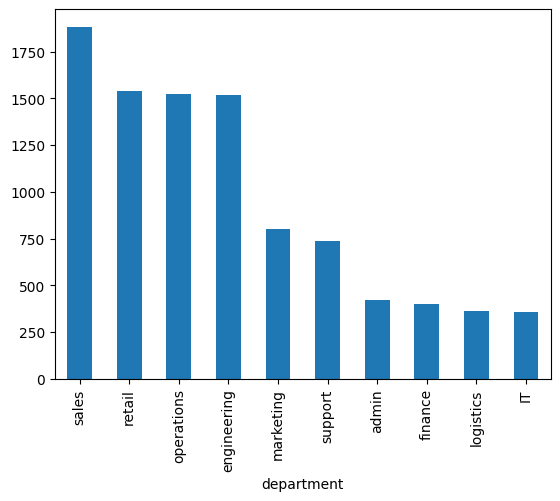

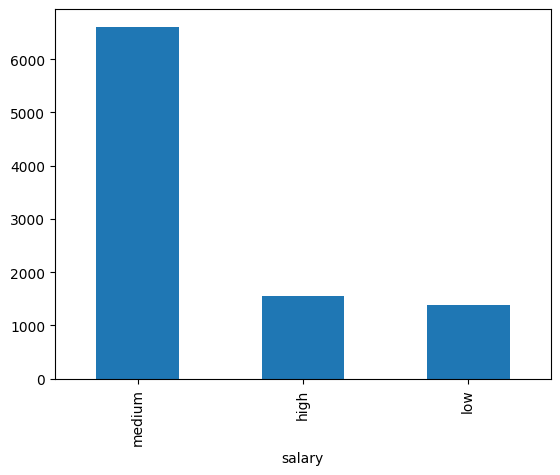

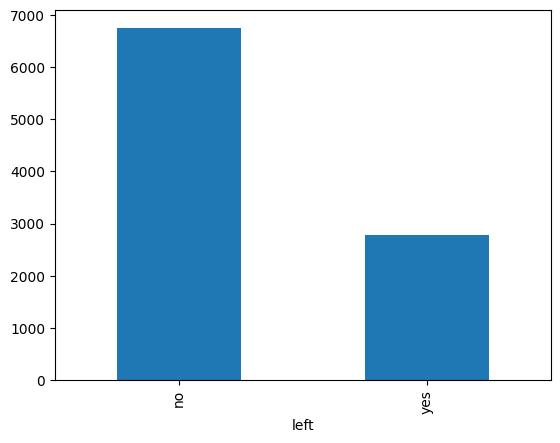

In [11]:
EData['department'].value_counts().plot(kind = 'bar')
plt.show()

EData['salary'].value_counts().plot(kind = 'bar')
plt.show()

EData['left'].value_counts().plot(kind = 'bar')
plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder


Encoder = LabelEncoder()

mapping = {'low': 1, 'medium': 2, 'high': 3}

OEncoder = OrdinalEncoder(categories=[list(mapping.keys())])

EData['department'] = Encoder.fit_transform(EData['department'])
# print(EData['department'].value_counts())

EData['salary'] = OEncoder.fit_transform(EData[['salary']])
# print(EData['salary'].value_counts())

EData['left'] = Encoder.fit_transform(EData['left'])
# print(EData['left'].value_counts())

print(EData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   int32  
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   float64
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   int32  
dtypes: float64(5), int32(2), int64(3)
memory usage: 670.9 KB
None


Histograms of the qualitative data (department, salary, and if the employee chose to leave) after label encoding

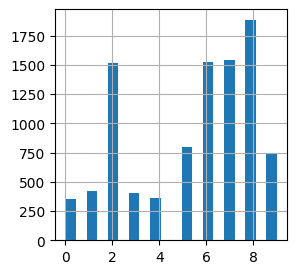

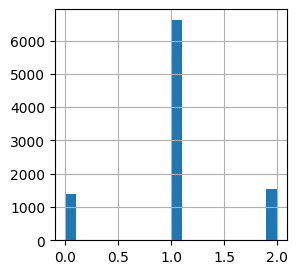

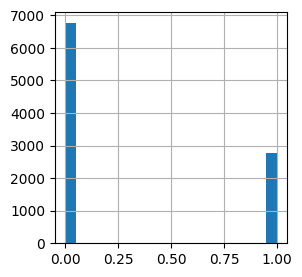

In [13]:
EData['department'].hist(bins = 20, figsize = (3,3))
plt.show()
EData['salary'].hist(bins = 20, figsize = (3,3))
plt.show()
EData['left'].hist(bins = 20, figsize = (3,3))
plt.show()

# Balancing Dataset

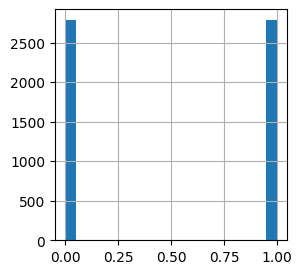

In [14]:
majority_class = EData[EData['left'] == 0]
minority_class = EData[EData['left'] == 1]

# undersampling the data to create a balanced dataset
num_samples_to_keep = len(minority_class)

# Undersample the majority class to match the number of samples in the minority class
majority_class_undersampled = resample(majority_class, replace=False, n_samples=num_samples_to_keep, random_state=42)

# Combine the undersampled majority class with the minority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_data['left'].hist(bins = 20, figsize = (3,3))
plt.show()

# Start of Logistic model for classification

## - Splitting data into training and testing sets

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



FV = EData.drop('left', axis=1) #Features Values
GTV = EData['left'] #Ground Truth Values

B_FV = balanced_data.drop('left', axis=1) #Features Values
B_GTV = balanced_data['left'] #Ground Truth Values


print(FV.shape)
print(GTV.shape)

FV_train_val, FV_test, GTV_train_val, GTV_test = train_test_split(FV, GTV, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(FV_train_val.shape[0], FV_test.shape[0]))

FV_B_train_val, FV_B_test, GTV_B_train_val, GTV_B_test = train_test_split(B_FV, B_GTV, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(FV_B_train_val.shape[0], FV_B_test.shape[0]))

normalizer = StandardScaler()
FV_train_val = normalizer.fit_transform(FV_train_val)
FV_test = normalizer.transform(FV_test)
FV_B_train_val = normalizer.fit_transform(FV_B_train_val)
FV_B_test = normalizer.transform(FV_B_test)
#histograms of normalized data, not needed but figured I keep the code here
'''for col_idx in range(FV_train_val.shape[1]):
    plt.hist(FV_train_val[:, col_idx], bins=30, density=True, alpha=0.5)  # Adjust bins, density, and alpha as needed
    plt.xlabel(f'Value (Column {col_idx + 1})')  # Label for x-axis
    plt.ylabel('Frequency')  # Label for y-axis
    plt.title(f'Histogram - Column {col_idx + 1}')  # Title for the histogram
    plt.grid(True)  # Show grid
    plt.show()'''

(9540, 9)
(9540,)
train_val: 8395, test: 1145
train_val: 4899, test: 669


"for col_idx in range(FV_train_val.shape[1]):\n    plt.hist(FV_train_val[:, col_idx], bins=30, density=True, alpha=0.5)  # Adjust bins, density, and alpha as needed\n    plt.xlabel(f'Value (Column {col_idx + 1})')  # Label for x-axis\n    plt.ylabel('Frequency')  # Label for y-axis\n    plt.title(f'Histogram - Column {col_idx + 1}')  # Title for the histogram\n    plt.grid(True)  # Show grid\n    plt.show()"

In [16]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a range of regularization coefficients (C values)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionaries to store best metric values and their corresponding C values
best_accuracy = {'Value': 0, 'C': None}
best_precision = {'Value': 0, 'C': None}
best_recall = {'Value': 0, 'C': None}
best_f1 = {'Value': 0, 'C': None}

# Perform 5-fold cross-validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(FV_train_val)):
    X_train, X_val = FV_train_val[train_index], FV_train_val[val_index]
    y_train, y_val = GTV_train_val.iloc[train_index], GTV_train_val.iloc[val_index]

    # Initialize dictionaries to store evaluation metrics for each C value
    c_metrics = []

    # Iterate over each C value
    for C in C_values:
        # Initialize logistic regression model with current C value
        model = LogisticRegression(C=C)

        # Fit the model on training data
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Store evaluation metrics for this C value
        c_metrics.append({'C': C, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

        # Update best metric values if necessary
        if accuracy > best_accuracy['Value']:
            best_accuracy['Value'] = accuracy
            best_accuracy['C'] = C
        if precision > best_precision['Value']:
            best_precision['Value'] = precision
            best_precision['C'] = C
        if recall > best_recall['Value']:
            best_recall['Value'] = recall
            best_recall['C'] = C
        if f1 > best_f1['Value']:
            best_f1['Value'] = f1
            best_f1['C'] = C

    # Store evaluation metrics for this fold
    #fold_metrics.append(c_metrics)

# Print best metric values and their corresponding C values
print('Best Accuracy:', best_accuracy)
print('Best Precision:', best_precision)
print('Best Recall:', best_recall)
print('Best F1 Score:', best_f1)

Best Accuracy: {'Value': 0.676200204290092, 'C': 0.01}
Best Precision: {'Value': 0.6901709401709402, 'C': 0.001}
Best Recall: {'Value': 0.6924686192468619, 'C': 0.01}
Best F1 Score: {'Value': 0.676200204290092, 'C': 0.01}


# Full Logistic Regression Model


In [29]:
clf = LogisticRegression(penalty='l2', C=best_accuracy['C'], solver='lbfgs')
clf.fit(FV_train_val, GTV_train_val)

clf_b = LogisticRegression(penalty='l2', C=best_accuracy['C'], solver='lbfgs')
clf_b.fit(FV_B_train_val, GTV_B_train_val)

y_test_pred = clf.predict(FV_test)
y_b_test_pred = clf_b.predict(FV_B_test)

acc = accuracy_score(GTV_test, y_test_pred)
f1 = f1_score(GTV_test, y_test_pred)
recall = recall_score(GTV_test, y_test_pred)
precision = precision_score(GTV_test, y_test_pred)

acc_b = accuracy_score(GTV_B_test, y_b_test_pred)
f1_b = f1_score(GTV_B_test, y_b_test_pred)
recall_b = recall_score(GTV_B_test, y_b_test_pred)
precision_b = precision_score(GTV_B_test, y_b_test_pred)


print("unbalanced:")
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(acc, recall, precision, f1))

print("balanced")
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(acc_b, recall_b, precision_b, f1_b))


# Get the feature names from the original DataFrame FV
feature_names = FV.columns.tolist()

# Print the most weighted coefficients with original feature labels
coefficients = clf.coef_[0]
coefficients_abs = abs(coefficients)
sorted_indices = coefficients_abs.argsort()[::-1]  # Sort indices by absolute coefficient values in descending order

print("Most Weighted Coefficients:")
for idx in sorted_indices:
    feature_label = feature_names[idx]
    print(f"Feature: {feature_label}, Coefficient: {coefficients[idx]}")

unbalanced:
accuracy: 0.717, recall: 0.193, precision: 0.717, f1: 0.305
balanced
accuracy: 0.667, recall: 0.657, precision: 0.695, f1: 0.675
Most Weighted Coefficients:
Feature: review, Coefficient: 0.8302269157041582
Feature: satisfaction, Coefficient: 0.30957118884828194
Feature: avg_hrs_month, Coefficient: 0.13149715416968574
Feature: promoted, Coefficient: -0.0904785347562236
Feature: tenure, Coefficient: 0.08211665418556058
Feature: projects, Coefficient: -0.04137610509798731
Feature: bonus, Coefficient: -0.013448205245270463
Feature: salary, Coefficient: -0.006445471584616647
Feature: department, Coefficient: -0.0023492070674029884


# Cluster Methods


Results for PCA and KMeans Clustering:
Percentage of Cluster 0 with 'left' as 1: 56.539509536784735%
Percentage of Cluster 1 with 'left' as 0: 57.29483282674772%


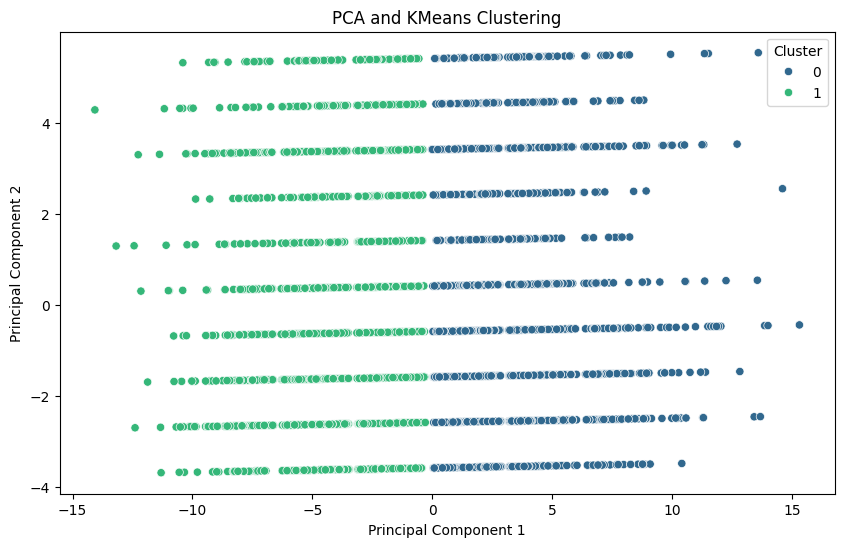

In [83]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import normalized_mutual_info_score
import seaborn as sns
import itertools

# Assuming FV is your feature DataFrame and GTV is the ground truth variable

# Get all combinations of features
feature_combinations = list(itertools.combinations(FV.columns, 1))  # Generate individual features initially

# Perform KMeans clustering on feature pairs
results_feature_pairs = []

for feature_pair in feature_combinations:
    features_subset = FV[list(feature_pair)]
    
    # Initialize KMeans clustering
    kmeans = KMeans(n_clusters=2)
    cluster_labels = kmeans.fit_predict(features_subset)
    
    # Calculate clustering evaluation metrics (e.g., NMI)
    clustering_score = normalized_mutual_info_score(GTV, cluster_labels)
    
    # Store results
    results_feature_pairs.append({
        'Features': feature_pair,
        'Cluster Labels': cluster_labels,
        'Clustering Score': clustering_score
    })

# Sort results by clustering score to identify impactful features
results_sorted_feature_pairs = sorted(results_feature_pairs, key=lambda x: x['Clustering Score'], reverse=True)

# Perform PCA and KMeans clustering on the entire dataset
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(B_FV)

kmeans_pca = KMeans(n_clusters=2)
cluster_labels_pca = kmeans_pca.fit_predict(reduced_features)

# Calculate the percentage of each cluster that has 'left' as either 1 or 0
cluster_left_1 = np.sum(np.logical_and(cluster_labels_pca == 0, B_GTV == 1)) / np.sum(cluster_labels_pca == 0)
cluster_left_0 = np.sum(np.logical_and(cluster_labels_pca == 1, B_GTV == 0)) / np.sum(cluster_labels_pca == 1)

# Print or visualize the percentages
print("\nResults for PCA and KMeans Clustering:")
print(f"Percentage of Cluster 0 with 'left' as 1: {cluster_left_1 * 100}%")
print(f"Percentage of Cluster 1 with 'left' as 0: {cluster_left_0 * 100}%")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=cluster_labels_pca, palette='viridis')
plt.title('PCA and KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




# KNN on Data

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

FV = EData.drop('left', axis=1) #Features Values
GTV = EData['left'] #Ground Truth Values

# B_FV = balanced_data.drop('left', axis=1) #Features Values
# B_GTV = balanced_data['left'] #Ground Truth Values

print(FV.shape)
print(GTV.shape)

FV_train_val, FV_test, GTV_train_val, GTV_test = train_test_split(FV, GTV, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(FV_train_val.shape[0], FV_test.shape[0]))

normalizer = StandardScaler()
FV_train_val = normalizer.fit_transform(FV_train_val)
FV_test = normalizer.transform(FV_test)

(9540, 9)
(9540,)
train_val: 8395, test: 1145


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,100)
param_grid = dict(n_neighbors = k_range)

clf_knn = KNeighborsClassifier(n_neighbors = 1)

grid = GridSearchCV(clf_knn, param_grid, cv = 5, scoring = 'accuracy')
grid.fit(FV_train_val, GTV_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.8353782013103037
{'n_neighbors': 21}


In [21]:
clf_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(FV_train_val, GTV_train_val)
y_test_pred = clf_knn.predict(FV_test)

TP = 0
TN = 0
FP = 0
FN = 0
size = GTV_test.shape[0]

for true, predicted in zip(GTV_test, y_test_pred):
    if true == 1 and predicted == 1:
        TP += 1
    if true == 1 and predicted == 0:
        FN += 1
    if true == 0 and predicted == 1:
        FP += 1
    if true == 0 and predicted == 0:
        TN += 1
        
print("True Positive = ", TP, "\n")
print("True Negative = ", TN, "\n")
print("False Positive = ", FP, "\n")
print("False Negative = ", FN, "\n")

recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1 = (2*(recall)*(precision))/(recall+precision)
accuracy = (TP+TN)/(size)
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(accuracy, recall, precision, f1))

# Decent results overall. Not sure its the greatest thing we've produced, but KNN is cheap, particularly for binary classification 


True Positive =  206 

True Negative =  728 

False Positive =  50 

False Negative =  161 

accuracy: 0.816, recall: 0.561, precision: 0.805, f1: 0.661
